In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.table import Table
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
# penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
# penguins.head()

In [4]:
# old_stars = pd.read_csv('/arc/home/aydanmckay/prisdss2.csv')
stars = pd.read_csv('/arc/home/aydanmckay/pris_sdss.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/arc/home/aydanmckay/pris_sdss.csv'

In [5]:
stars['TEFF_ADOP_s']

NameError: name 'stars' is not defined

In [6]:
# penguins = penguins.dropna()
# penguins.species_short.value_counts()

In [7]:
# stars = stars.dropna()
# stars_col = [str(float(int(star*10))/10) for star in stars['ELODIE_FEH_s']]
# stars['binelodie'] = stars_col

In [8]:
# stars['binelodie']

In [9]:
# sns.pairplot(penguins, hue='species_short')

In [10]:
# sns.pairplot(stars, hue='binelodie')

In [12]:
import umap
import umap.plot
# from bokeh.transform import linear_cmap
# from bokeh.palettes import Turbo256

In [ ]:
reducer = umap.UMAP()

In [ ]:
# penguin_data = penguins[
#     [
#         "culmen_length_mm",
#         "culmen_depth_mm",
#         "flipper_length_mm",
#         "body_mass_g",
#     ]
# ].values
# scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [ ]:
# star_data = stars[
#     [
#         "u_0_p",
#         "g_0_p",
#         "r_0_p",
#         "i_0_p",
#         "z_0_p",
#     ]
# ].values
# scaled_star_data = StandardScaler().fit_transform(star_data)

In [ ]:
# embedding = reducer.fit_transform(scaled_penguin_data)
# embedding.shape

In [ ]:
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Penguin dataset', fontsize=24)

In [ ]:
# embedding = reducer.fit_transform(scaled_star_data)
# embedding.shape

In [ ]:
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the Pristine dataset', fontsize=24)

In [ ]:
# digits = load_digits()
# digits

In [ ]:
# fig, ax_array = plt.subplots(20, 20)
# axes = ax_array.flatten()
# for i, ax in enumerate(axes):
#     ax.imshow(digits.images[i], cmap='gray_r')
# plt.setp(axes, xticks=[], yticks=[], frame_on=False)
# plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [ ]:
# digits_df = pd.DataFrame(digits.data[:,1:11])
# digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
# sns.pairplot(digits_df, hue='digit', palette='Spectral')

Testing Various scalers

In [ ]:
stars1 = stars.loc[stars["g_chp_psf_p"] < 1e19]
stars2 = stars1.loc[stars1["r_chp_psf_p"] < 1e19]
stars3 = stars2.loc[stars2["i_chp_psf_p"] < 1e19]
stars4 = stars3.loc[stars3["z_chp_psf_p"] < 1e19]
stars5 = stars4.loc[stars4["y_chp_psf_p"] < 1e19]
stars6 = stars5.loc[stars5["MAG_AUTO_p"] < 95]
# stars7 = stars6.loc[stars6["MAG_BEST_p"] < 95]
stars8 = stars7.loc[stars7["G_MAG_s"] > 0]
stars9 = stars8.loc[np.isnan(stars8["phot_g_mean_mag_1_p"]) == False]
stars10 = stars9.loc[np.isnan(stars9["phot_bp_mean_mag_1_p"]) == False]
stars11 = stars10.loc[np.isnan(stars10["phot_rp_mean_mag_1_p"]) == False]
# this is for the colour map, also probably corresponds to whether or not its a star
# before this the data frame is 109144 rows long
# stars12 not used to create pdfs pristinecolouredteff_w_nan.pdf and pristinecolouredlogg_w_nan.pdf
stars12 = stars11.loc[stars11['LOGG_ADOP_s'] > -9000]
data = pd.DataFrame([stars12['phot_g_mean_mag_1_p'],stars12['phot_bp_mean_mag_1_p'],stars12['phot_rp_mean_mag_1_p'],stars12['g_chp_psf_p'],
                 stars12['r_chp_psf_p'],stars12['i_chp_psf_p'],stars12['z_chp_psf_p'],stars12['y_chp_psf_p'],stars12['MAG_AUTO_p'],
                 stars12['V_MAG_s'],stars12['G_MAG_s']]).T
data #38514

In [ ]:
reducer = umap.UMAP(random_state=42)
scaled_star_data = StandardScaler().fit_transform(data)
reducer.fit(scaled_star_data)
# minmax scaler

In [24]:
# UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
#      n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [25]:
embedding = reducer.transform(scaled_star_data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(38514, 2)

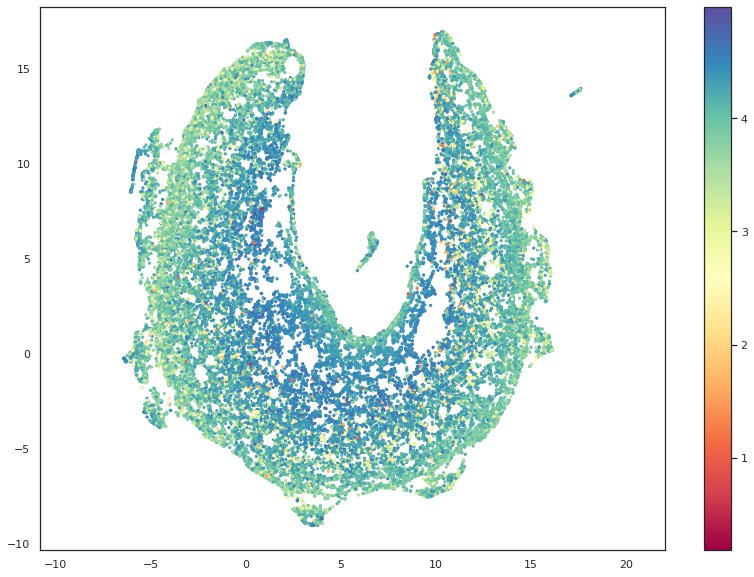

In [26]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=stars12['LOGG_ADOP_s'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.savefig('parametricplotthesis.png')
# plt.title('UMAP Projection of the Combined Pristine Dataset, Coloured by SDSS logg', fontsize=24);
# plt.savefig('/arc/home/aydanmckay/pristinecolouredlogg.pdf')

In [32]:
# data = pd.DataFrame([stars12['phot_g_mean_mag_1_p']-stars12['phot_bp_mean_mag_1_p'],stars12['phot_bp_mean_mag_1_p']-stars12['phot_rp_mean_mag_1_p'],
#                      stars12['g_chp_psf_p']-stars12['r_chp_psf_p'],stars12['r_chp_psf_p']-stars12['i_chp_psf_p'],
#                      stars12['i_chp_psf_p']-stars12['z_chp_psf_p'],stars12['z_chp_psf_p']-stars12['y_chp_psf_p']]).T

In [33]:
# reducer = umap.UMAP(random_state=42)
# scaled_star_data = StandardScaler().fit_transform(data)
# reducer.fit(scaled_star_data)

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [34]:
# embedding = reducer.transform(scaled_star_data)
# # Verify that the result of calling transform is
# # idenitical to accessing the embedding_ attribute
# assert(np.all(embedding == reducer.embedding_))
# embedding.shape

(38514, 2)

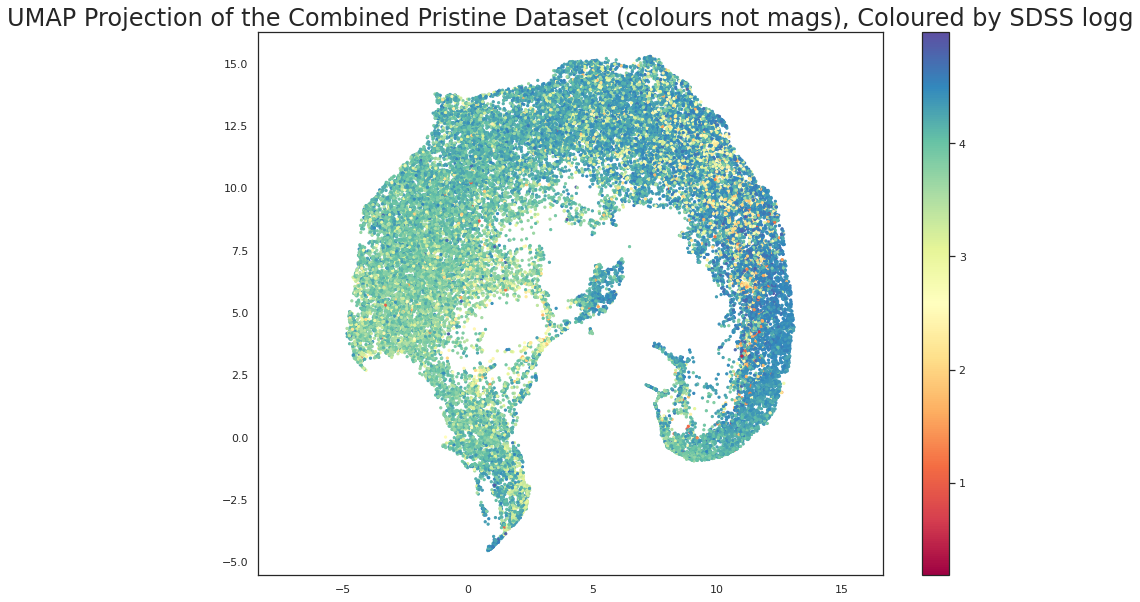

In [37]:
# plt.scatter(embedding[:, 0], embedding[:, 1], c=stars12['LOGG_ADOP_s'], cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar()
# plt.title('UMAP Projection of the Combined Pristine Dataset (colours not mags), Coloured by SDSS logg', fontsize=24);
# plt.savefig('/arc/home/aydanmckay/pristinecoloursnotmagslogg.pdf')

In [1]:
hover_data = pd.DataFrame({'logg':stars12['LOGG_ADOP_s'],
                           'RA':stars12['RA(CaHK)_p'],
                           'Dec':stars12['Dec(CaHK)_p'],
                           'index':np.arange(len(stars12))})
umap.plot.output_notebook()

# mapper = linear_cmap(field_name="logg", palette=Turbo256, low=min(stars12['LOGG_ADOP_s']), high=max(stars12['LOGG_ADOP_s']))

p = umap.plot.interactive(reducer.fit(scaled_star_data), labels=stars12['LOGG_ADOP_s'], hover_data=hover_data, point_size=4)

# p = umap.plot.interactive(reducer, values=stars12['LOGG_ADOP_s'], cmap='Spectral', hover_data=hover_data, point_size=4)
# umap.plot.show(p)

NameError: name 'pd' is not defined

In [28]:
# from bokeh.plotting import figure, show, save
# from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
# from bokeh.palettes import Spectral10


In [29]:
# stars_df = pd.DataFrame(embedding, columns=('x', 'y'))
# stars_df['color'] = [str(x) for x in stars12['LOGG_ADOP_s']]
# datasource = ColumnDataSource(stars_df)
# color_mapping = CategoricalColorMapper(factors=[str(x) for x in stars12['CaHK_0_p']],
#                                        palette=Spectral)
# plot_figure = figure(
#     title='UMAP Projection of the Combined Pristine Dataset, Coloured by SDSS logg',
#     plot_width=600,
#     plot_height=600,
#     tools=('pan, wheel_zoom, reset')
# )
# plot_figure.circle(
#     'x',
#     'y',
#     source=datasource,
#     color=dict(field='color', transform=color_mapping),
#     line_alpha=0.6,
#     fill_alpha=0.6,
#     size=4
# )
# save(plot_figure,'/arc/home/aydanmckay/plot3.html')

In [30]:
# prepare some data
# x = [1, 2, 3, 4, 5]
# y = [6, 7, 2, 4, 5]
# # create a new plot with a title and axis labels
# p = figure(title="Simple line example", x_axis_label='x', y_axis_label='y')
# # add a line renderer with legend and line thickness to the plot
# p.line(x, y, legend_label="Temp.", line_width=2)
# show the results
# save(p,'/arc/home/aydanmckay/bokeh.html')